In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from prepData import *
from math import sqrt
from sklearn.neural_network import MLPRegressor
from plotterUtils import *

In [2]:
df = pd.read_pickle("AlexxTrees/JRA_pandas_df_40.pkl")

In [3]:
del df["sumpt_highpt"]
del df["sumpt_lowpt"]
del df["ntrks_highpt"]
del df["ntrks_lowpt"]
del df["npus"]
del df["tnpus"]
del df["zpositions"]
print df.columns
df.head()

Index([u'bxns', u'rhos', u'rho', u'pthat', u'beta', u'betaStar', u'weight',
       u'npv', u'run', u'lumi', u'evt', u'nref', u'refrank', u'refpdgid',
       u'refpdgid_algorithmicDef', u'refpdgid_physicsDef', u'refe', u'refpt',
       u'refeta', u'refphi', u'refy', u'refdrjt', u'refarea', u'jte', u'jtpt',
       u'jteta', u'jtphi', u'jty', u'jtjec', u'jtarea', u'jtchf', u'jtnhf',
       u'jtnef', u'jtcef', u'jtmuf', u'jthfhf', u'jthfef', u'refdzvtx'],
      dtype='object')


,bxns,rhos,rho,pthat,beta,betaStar,weight,npv,run,lumi,...,jtjec,jtarea,jtchf,jtnhf,jtnef,jtcef,jtmuf,jthfhf,jthfef,refdzvtx
0,"[-12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2...","[10.1469, 32.9775, 27.4317, 12.7517, 17.8644, ...",28.100410,2600.259521,0.0,0.0,8.410764e-11,38,1,47147,...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.508639, 0.518612, 0.508639, 0.498666, 0.498...","[0.11701, 0.284365, 0.664331, 0.673689, 0.5914...","[0.47661, 0.22477, 0.0289695, 0.0, 0.13433, 0....","[0.40638, 0.490864, 0.3067, 0.326311, 0.274175...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.860826, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0911265, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[-12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2...","[12.1913, 38.28, 29.6814, 16.8821, 18.3815, 19...",33.208748,179.828903,0.0,0.0,1.397196e-05,38,1,47147,...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.528585, 0.528585, 0.468746, 0.488692, 0.468...","[0.442989, 0.477891, 0.218358, 0.653817, 0.275...","[0.0, 0.160527, 0.139831, 0.0512024, 0.0, 0.0,...","[0.518568, 0.276307, 0.641811, 0.294981, 0.724...","[0.0384432, 0.0852745, 0.0, 0.0, 0.0, 0.0, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.840431, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.159569, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"[-12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2...","[1.97657, 7.37235, 7.32813, 2.40282, 2.48199, ...",5.984038,134.691345,0.0,0.0,5.133100e-05,6,1,47147,...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.498666, 0.478719, 0.518612, 0.498666, 0.518...","[0.0128365, 0.0606882, 0.411067, 0.789983, 0.0...","[0.892757, 0.561604, 0.0657896, 0.0286737, 0.8...","[0.094406, 0.377707, 0.32848, 0.181343, 0.0573...","[0.0, 0.0, 0.194664, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.150195, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0846661, 0.297647, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
3,"[-12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2...","[17.8316, 42.2649, 39.7708, 14.9844, 21.3724, ...",39.637169,196.324860,0.0,0.0,9.419340e-06,44,1,47147,...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.488692, 0.508639, 0.498666, 0.299199, 0.508...","[0.875107, 0.487102, 0.591181, 0.533516, 0.868...","[0.0202778, 0.0960594, 0.0, 0.41676, 0.0, 0.95...","[0.0969977, 0.416838, 0.408819, 0.0497241, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.00761754, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.951363, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0486371, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[-12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2...","[7.64501, 26.6282, 26.7316, 11.9983, 13.4056, ...",23.881189,127.821274,0.0,0.0,6.496735e-05,34,1,47147,...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]","[0.528585, 0.548532, 0.528585, 0.388959, 0.508...","[0.595612, 0.510889, 0.767581, 0.442988, 0.694...","[0.0664927, 0.162771, 0.0, 0.0806146, 0.0, 0.0...","[0.306485, 0.326339, 0.232419, 0.476398, 0.017...","[0.0314102, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.28804, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [4]:
perjet_cols=['refrank','refpdgid','refpdgid_algorithmicDef',
           'refpdgid_physicsDef','refe','refpt','refeta','refphi',
           'refy','refdrjt','refarea','jte','jtpt','jteta','jtphi',
            'jty','jtjec','jtarea','jtchf', 'jtnhf', 'jtnef', 'jtcef',
           'jtmuf', 'jthfhf', 'jthfef']
perevt_cols=['evt','weight','npv','rho','run','lumi']

new_df = pd.DataFrame()
for c in perjet_cols :
    new_df[c]=pd.Series(np.hstack(df[c].values))
new_df.head()

temp={}
for c in perevt_cols :
    temp[c]=[]
#print temp
for row in df.iterrows() :
    row = row[1]
    for c in perevt_cols :
        temp[c].extend([row[c]]*row['nref'])
for c in perevt_cols :
    new_df[c] = pd.Series(temp[c])
new_df['jtpx'] = map(np.cos,new_df['jtphi'])*new_df['jtpt']
new_df['jtpy'] = map(np.sin,new_df['jtphi'])*new_df['jtpt']
new_df['refpx'] = map(np.cos,new_df['refphi'])*new_df['refpt']
new_df['refpy'] = map(np.sin,new_df['refphi'])*new_df['refpt']
new_df['jtjec'] = new_df['refpt']/new_df['jtpt']
new_df['jtjes'] = new_df['jtpt']/new_df['refpt']
new_df.head()

,refrank,refpdgid,refpdgid_algorithmicDef,refpdgid_physicsDef,refe,refpt,refeta,refphi,refy,refdrjt,...,weight,npv,rho,run,lumi,jtpx,jtpy,refpx,refpy,jtjes
0,0,0,0,0,3269.298340,2581.908691,0.713947,0.853970,0.713667,0.003951,...,8.410764e-11,38,28.10041,1,47147,1619.392334,1854.515503,1696.302979,1946.486328,0.953575
1,1,0,0,0,2403.573486,2345.324951,0.218725,-2.295450,0.218545,0.008422,...,8.410764e-11,38,28.10041,1,47147,-1433.504028,-1612.572266,-1554.660400,-1756.012451,0.919966
2,2,0,0,0,163.752136,121.629738,-0.803584,-2.538169,-0.798541,0.011554,...,8.410764e-11,38,28.10041,1,47147,-93.330612,-62.776466,-100.149643,-69.020584,0.924764
3,3,0,0,0,171.643845,110.427879,-1.006807,-1.792260,-1.002989,0.018502,...,8.410764e-11,38,28.10041,1,47147,-20.745800,-98.217781,-24.256310,-107.730904,0.909054
4,4,0,0,0,43.833157,29.262157,0.952690,-1.879473,0.943150,0.080068,...,8.410764e-11,38,28.10041,1,47147,-5.630722,-24.198168,-8.889781,-27.879126,0.849037


In [5]:
factorNames = ['jtpt','jteta',
               'refphi',
               #'refarea',
               'jtchf', 'jtnhf', 'jtnef', 'jtcef',
               'jtmuf', 'jthfhf', 'jthfef'
              ]
allVars = ['jtpt','jteta',
            #'refphi',
            #'refarea',
            'jtchf', 'jtnhf', 'jtnef', 'jtcef',
            'jtmuf', 'jthfhf', 'jthfef'
            ]

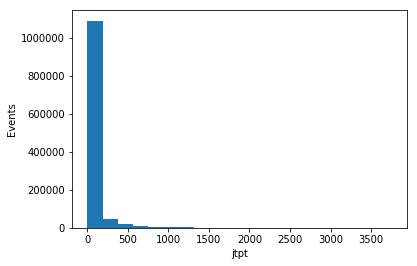

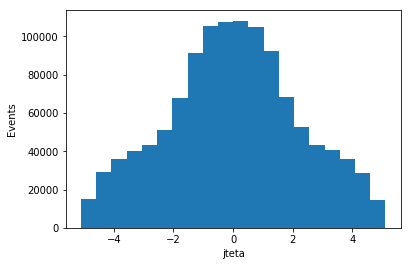

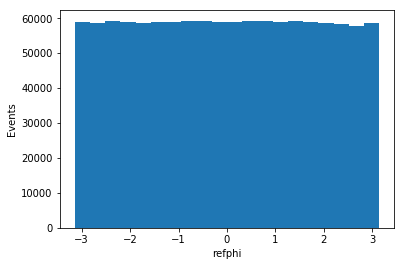

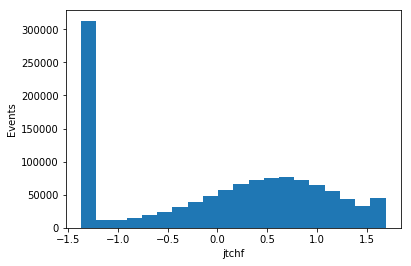

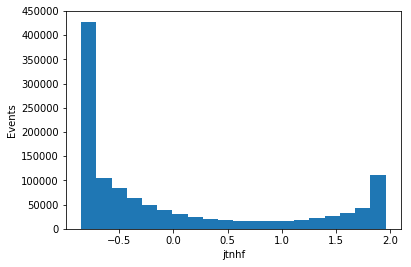

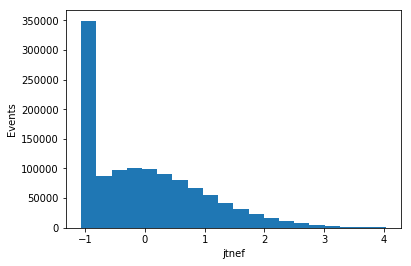

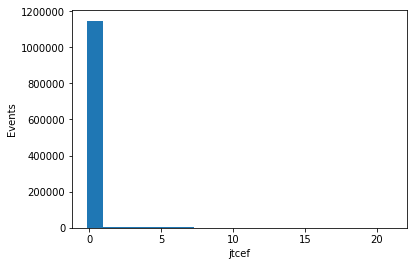

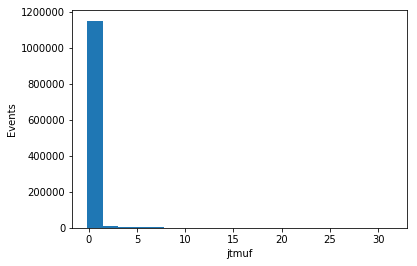

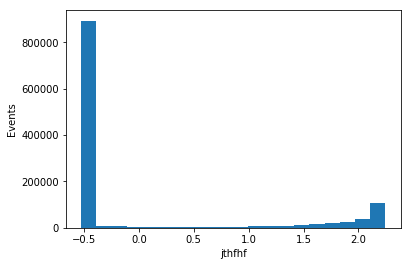

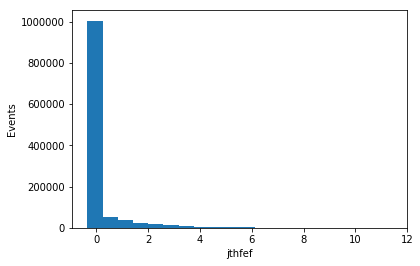

In [10]:
scaleData = True
if( scaleData ):
    means = new_df.mean()
    rmss = new_df.std()

    normalFactors = ['jtchf', 'jtnhf', 'jtnef', 'jtcef',
               'jtmuf', 'jthfhf', 'jthfef']

    for f in normalFactors:
        new_df[f] = map(lambda x : (x-means[f])/rmss[f],new_df[f])

    for i,f in enumerate(factorNames):
        plt.hist(new_df[f],20)
        plt.xlabel(f)
        plt.ylabel("Events")
        plt.show()

In [11]:
new_df = new_df.loc[new_df['jtpt']>100.,:]
df_train,df_test = np.array_split(new_df,2)

model = MLPRegressor(hidden_layer_sizes=[500,400,300,200],activation='tanh',random_state=12345)
model.fit(df_train[factorNames],df_train['jtjec'])

df_train['prediction'] = model.predict(df_train[factorNames])
df_train['residual'] = df_train['prediction']-df_train['jtjec']
df_train['sq_diff'] = map(lambda x : x*x,df_train['residual'])
print "RMSE:",sqrt(df_train.sum()['sq_diff']/len(df_train['sq_diff']))
df_test['prediction'] = model.predict(df_test[factorNames])
df_test['residual'] = df_test['prediction']-df_test['jtjec']
df_test['sq_diff'] = map(lambda x : x*x,df_test['residual'])
print "RMSE:",sqrt(df_test.sum()['sq_diff']/len(df_test['sq_diff']))


RMSE: 0.122813249408
RMSE: 0.122473189926


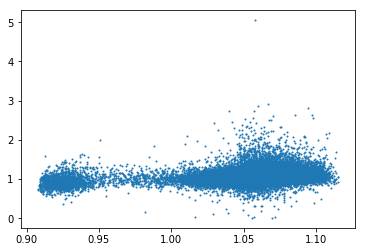

In [12]:
plt.scatter(df_test['prediction'],df_test['jtjec'],s=1)
plt.show()

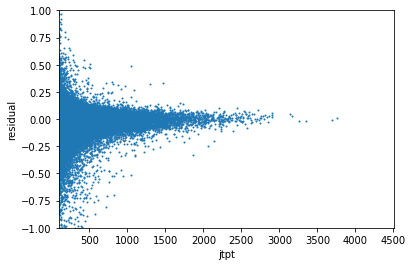

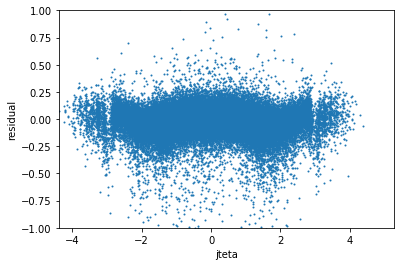

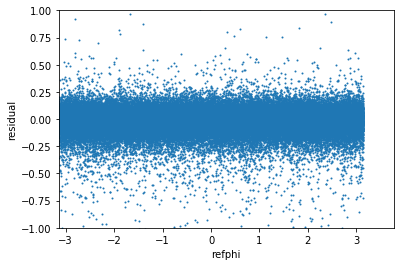

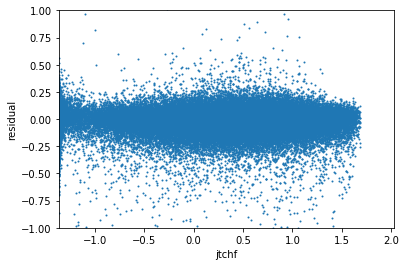

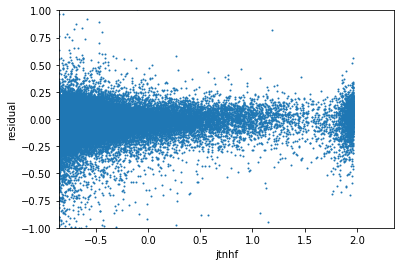

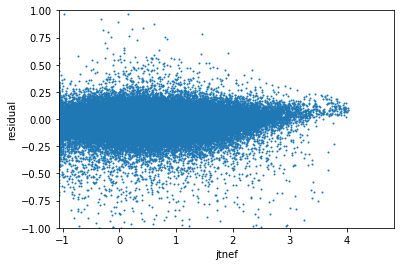

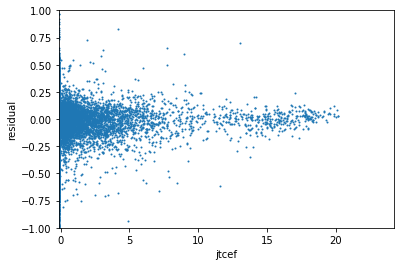

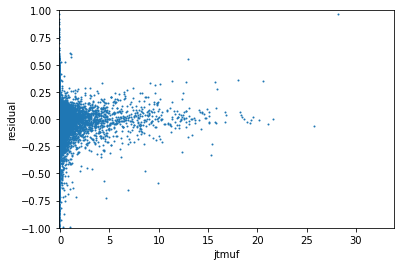

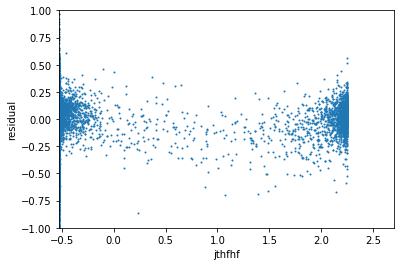

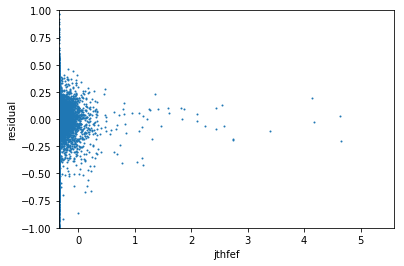

In [13]:
means = df_test.mean()
mins = df_test.min()
maxs = df_test.max()
def generate_scan(xlow,xhigh,n=100,projectionVar='jtpt'):
    scanData = []
    for f in factorNames:
        if f == projectionVar : 
            a = range(0,n+1)
            a = map(lambda x : xlow+x*(xhigh-xlow)/float(n+1),a)
            scanData.append(a)
        else :
            scanData.append([means[f]]*(n+1))
    return np.array(scanData).transpose()

for i,f in enumerate(factorNames):
    #plt.subplot(3,4,i+1)
    scanX = generate_scan(min(df_test[f]),max(df_test[f]),100,f)
    #print len(scanX.transpose()[i])
    scanY = model.predict(scanX)
    #print len(scanY)
    plt.scatter(df_test[f],df_test['residual'],s=1)
    #plt.scatter(scanX.transpose()[i],scanY,s=3,color='r')
    plt.xlabel(f)
    plt.ylabel("residual")
    plt.xlim(mins[f],maxs[f]*1.2)
    plt.ylim(-1,1)
    plt.show()

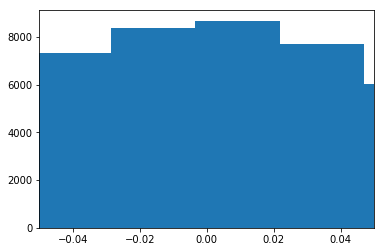

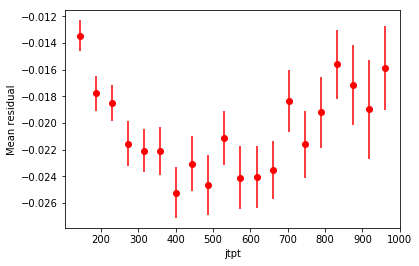

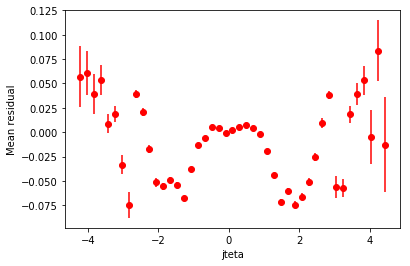

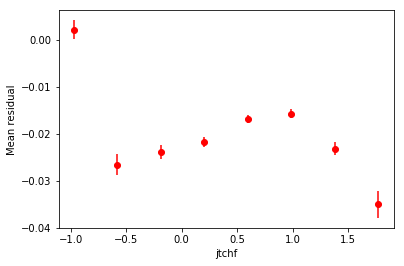

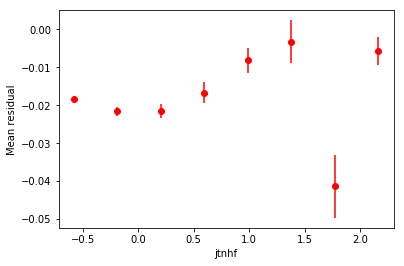

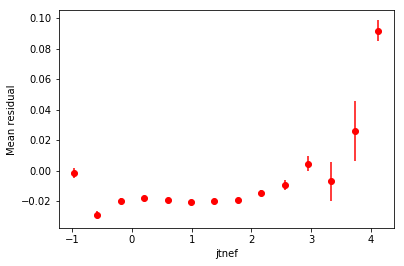

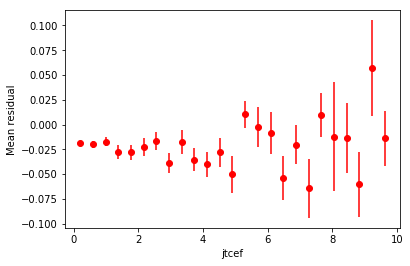

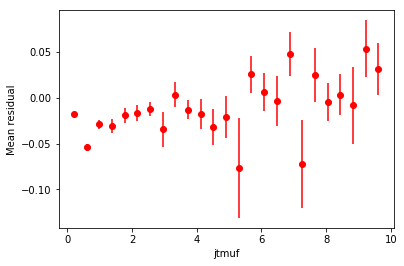

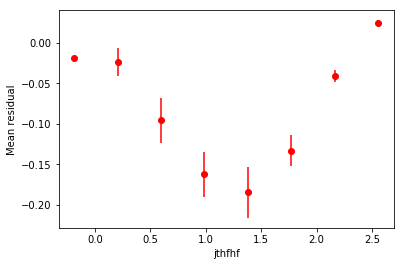

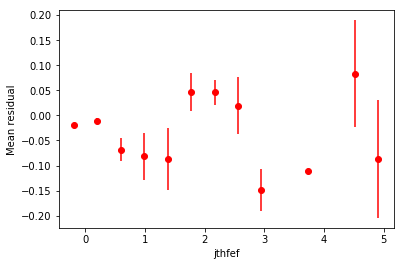

In [14]:
plt.hist(df_test['residual'],200)
plt.xlim(-0.05,0.05)
#plt.gca().set_yscale("log")
plt.show()

plotMean(df_test,'residual','jtpt',20,100,1000)
plt.show()
plotMean(df_test,'residual','jteta',50,-5.,5.)
plt.show()
plotMean(df_test,'residual','jtchf',50,-10.,10.)
plt.show()
plotMean(df_test,'residual','jtnhf',50,-10.,10.)
plt.show()
plotMean(df_test,'residual','jtnef',50,-10.,10.)
plt.show()
plotMean(df_test,'residual','jtcef',50,-10.,10.)
plt.show()
plotMean(df_test,'residual','jtmuf',50,-10.,10.)
plt.show()
plotMean(df_test,'residual','jthfhf',50,-10.,10.)
plt.show()
plotMean(df_test,'residual','jthfef',50,-10.,10.)
plt.show()

In [15]:
# cut=(df_test['jet_pt_ak7']>300.)

# df_test['res_sq'] = map(lambda x : x*x , df_test['residual'])
# print sqrt(df_test.loc[cut,:].sum()['res_sq']/len(df_test.loc[cut,'residual']))

# plt.hist(df_test.loc[cut,'residual'],200)
# plt.xlim(-0.05,0.05)
# plt.show()
 
# selectedData = df_test.loc[cut,:]
# plotMean(selectedData,'residual','jet_pt_ak7',20,100,1000)
# plt.show()
# plotMean(selectedData,'residual','jet_eta_ak7',50,-10.,10.)
# plt.show()
# plotMean(selectedData,'residual','jet_electronFrac_ak7',50,-10.,10.)
# plt.show()
# plotMean(selectedData,'residual','jet_muonFrac_ak7',50,-10.,10.)
# plt.show()
# plotMean(selectedData,'residual','jet_photonFrac_ak7',50,-10.,10.)
# plt.show()
# plotMean(selectedData,'residual','jet_neuHadronFrac_ak7',50,-10.,10.)
# plt.show()
# plotMean(selectedData,'residual','jet_charHadronFrac_ak7',50,-10.,10.)
# plt.show()
# plotMean(selectedData,'residual','jet_electronMult_ak7',50,-10.,10.)
# plt.show()
# plotMean(selectedData,'residual','jet_muonMult_ak7',50,-10.,10.)
# plt.show()
# plotMean(selectedData,'residual','jet_photonMult_ak7',50,-10.,10.)
# plt.show()
# plotMean(selectedData,'residual','jet_neuHadronMult_ak7',50,-10.,10.)
# plt.show()
# plotMean(selectedData,'residual','jet_charHadronMult_ak7',50,-10.,10.)
# plt.show()

In [16]:
df_test['jtpt_corr'] = df_test['jtpt']*df_test['prediction']
df_test['jtpx_corr'] = map(np.cos,df_test['jtphi'])*df_test['jtpt_corr']
df_test['jtpy_corr'] = map(np.sin,df_test['jtphi'])*df_test['jtpt_corr']

sums=df_test.groupby(['evt']).sum()
sums.reset_index(inplace=True)

sums['jtpx_sq']=map(lambda x : x*x,sums['jtpx'])
sums['jtpy_sq']=map(lambda x : x*x,sums['jtpy'])
sums['refpx_sq']=map(lambda x : x*x,sums['refpx'])
sums['refpy_sq']=map(lambda x : x*x,sums['refpy'])
sums['jtpx_corr_sq']=map(lambda x : x*x,sums['jtpx_corr'])
sums['jtpy_corr_sq']=map(lambda x : x*x,sums['jtpy_corr'])
sums['met']=map(np.sqrt,sums['jtpx_sq']+sums['jtpy_sq'])
sums['met_phi']=map(np.arctan,sums['jtpx']/sums['jtpy'])
sums['refmet']=map(np.sqrt,sums['refpx_sq']+sums['refpy_sq'])
sums['refmet_phi']=map(np.arctan,sums['refpx']/sums['refpy'])
sums['met_corr']=map(np.sqrt,sums['jtpx_corr_sq']+sums['jtpy_corr_sq'])
sums['met_phi_corr']=map(np.arctan,sums['jtpx_corr']/sums['jtpy_corr'])

sums.head(n=10)

,evt,refrank,refpdgid,refpdgid_algorithmicDef,refpdgid_physicsDef,refe,refpt,refeta,refphi,refy,...,refpx_sq,refpy_sq,jtpx_corr_sq,jtpy_corr_sq,met,met_phi,refmet,refmet_phi,met_corr,met_phi_corr
0,42625,1,0,0,0,1461.005615,1033.944580,0.639576,-0.526611,0.633328,...,21457.984375,394.930725,26069.528094,1820.830931,159.451137,1.298767,147.827315,1.435955,167.004069,1.312421
1,42626,1,0,0,0,1477.177612,313.057220,4.206495,0.133892,4.197187,...,2003.352661,8.837774,1718.822616,119.266870,40.688981,-1.272762,44.857446,-1.504475,42.872946,-1.313230
2,42628,1,0,0,0,707.549316,424.636902,1.408286,-2.728016,1.402786,...,973.421692,993.168884,0.256401,517.533579,21.914169,0.045630,44.346258,0.780377,22.754999,-0.022255
3,42629,3,0,0,0,1754.200439,843.154358,-1.996451,0.687779,-1.992958,...,15149.182617,4720.201172,15548.894850,7395.809741,136.197356,0.978909,140.958802,1.061683,151.475096,0.967035
4,42630,3,0,0,0,1087.254883,510.696228,1.759639,-1.192226,1.762018,...,1802.282349,63.094654,903.303713,3.192226,27.280841,1.567374,43.190010,-1.385830,30.108071,-1.511419
5,42632,1,0,0,0,301.331360,284.748657,0.580416,-1.457870,0.573735,...,0.000934,3.157053,168.671401,43.467678,14.347800,1.088125,1.777072,0.017195,14.564995,1.101049
6,42634,1,0,0,0,706.444641,472.038727,1.856786,-2.941470,1.846231,...,10247.604492,175.366394,3285.035646,697.987355,61.189414,-1.151260,102.092952,-1.440719,63.111196,-1.138874
7,42637,6,0,0,0,3251.659180,2729.236816,-0.838357,6.100803,-0.816163,...,19294.607422,373.273895,6384.758003,6381.325403,106.896676,0.806194,140.242224,1.432593,112.987094,0.785533
8,42639,1,0,0,0,681.947388,415.998047,1.972761,-0.614792,1.964787,...,467.987335,5.153889,108.254366,823.527264,25.337555,-0.471960,21.751810,-1.466237,30.525098,-0.347823
9,42640,1,0,0,0,783.898438,525.922974,1.691033,-2.494174,1.681644,...,1402.316040,2.974120,1549.103728,3.177938,31.935833,-1.568905,37.487200,-1.524776,39.399006,1.525534


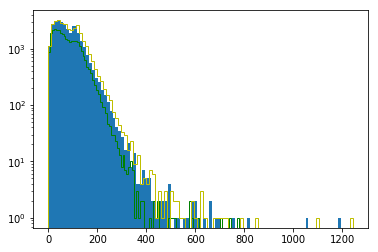

In [17]:
plt.hist(sums['met'],bins=100)
plt.hist(sums['refmet'],bins=100,histtype='step',color='g')
plt.hist(sums['met_corr'],bins=100,histtype='step',color='y')
plt.gca().set_yscale('log')
plt.show()

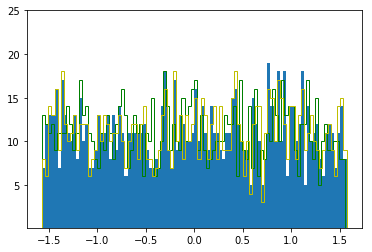

In [18]:
cut=sums['met']>200.
plt.hist(sums.loc[cut,'met_phi'],bins=100)
plt.hist(sums.loc[cut,'refmet_phi'],bins=100,histtype='step',color='g')
plt.hist(sums.loc[cut,'met_phi_corr'],bins=100,histtype='step',color='y')
#plt.gca().set_yscale('log')
plt.ylim(0.1,25)
plt.show()